# **Final Project 3**
# **1. Perkenalan**

Nama Anggota Kelompok :
1. Muhammad Rafi Ramadhan / PYTN-KS12-002
2. Aurisha Lutvinda Putrian / PYTN-KS12-014
3. Carenina Amanda Putri / PYTN-KS12-017

## Latar Belakang


Gagal jantung adalah kondisi serius yang mempengaruhi fungsi jantung dalam memompa darah ke seluruh tubuh. Dataset "Heart Failure Clinical Data" berisi informasi medis tentang pasien yang didiagnosis dengan penyakit ini. Dataset ini mencakup atribut klinis yang memberikan wawasan tentang faktor risiko dan karakteristik yang terkait dengan gagal jantung. Misalnya, atribut seperti usia, jenis kelamin, status perkawinan, kadar serum kreatinin, kadar serum natrium, dan ejection fraction. Dengan menganalisis dataset ini, kita dapat mengidentifikasi hubungan antara atribut-atribut ini dengan kejadian gagal jantung. Analisis ini membantu kita memahami lebih dalam faktor risiko dan karakteristik yang berkontribusi pada kondisi ini. Selain itu, analisis dataset ini juga dapat membantu dalam pengembangan model prediktif untuk memperkirakan risiko gagal jantung pada individu-individu tertentu.

## Objektif

Final Project 3 ini dibuat guna mengevaluasi konsep Clustering sebagai berikut:
- Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn
- Mampu mempersiapkan data untuk digunakan dalam Clustering
- Mampu mengimplementasikan Clustering pada data yang diberikan

# **2. Import Library**

Pada bagian ini menggunakan import library untuk melakukan preproceesing, visualisasi dan modelling

In [1]:
# untuk pemrosesan data
import pandas as pd
import numpy as np


# untuk visualisasi
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# untuk analisis statistik
import scipy
import pickle
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from joblib import load

# Me-non aktifkan peringatan pada python
import warnings
warnings.filterwarnings('ignore')

# **3. Data Loading**


## Read Dataframe dari source CSV

Memasukkan dataframe, dataframe yang digunakan kali ini adalah dataframe **Heart Failure Prediction**, yang kemudian menampilkan data teratas

In [2]:
df = pd.read_csv('E:/Kuliah/Semester 6/Hacktiv8/Final Project/FP 3/heart_failure_clinical_records_dataset.csv')
pd.set_option('display.max_columns', None)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
print("Dataset berisi {} baris dan {} kolom (atribut)".format(df.shape[0], df.shape[1]))

Dataset berisi 299 baris dan 13 kolom (atribut)


Dapat diketahui bahwa dataset yang digunakan terdiri dari 13 kolom dan 299 baris.

## Melihat informasi kolom, baris, dan data type

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Keterangan:

1. **age** - umur pasien
2. **anaemia** - apakah ada pengurangan haemoglobin
3. **creatinine_phosphokinase** - level enzim CPK dalam mcg/L
4. **diabetes** - apakah pasien punya riwayat diabetes
5. **ejection_fraction** - persentase darah yang meninggalkan jantung dalam persentasi
di setiap kontraksi jantung
6. **high_blood_pressure** - apakah pasien punya darah tinggi
7. **platelets** - jumlah platelet di darah dalam kiloplatelets/mL
8. **serum_creatinine** - level serum creatinine di darah dalam mg/dL
9. **serum_sodium** - level serum sodium di darah dalam mEq/L
10. **sex** - apakah pasien pria atau wanita
11. **smoking** - apakah pasien merokok
12. **time** - waktu dalam hari untuk follow-up
13. **DEATH_EVENT** - apakah pasien sudah meninggal saat waktu follow-up


## Melihat banyaknya unique values untuk tiap atribut.

In [5]:
for col in df.columns:
    print(col,': ', df[col].nunique())

age :  47
anaemia :  2
creatinine_phosphokinase :  208
diabetes :  2
ejection_fraction :  17
high_blood_pressure :  2
platelets :  176
serum_creatinine :  40
serum_sodium :  27
sex :  2
smoking :  2
time :  148
DEATH_EVENT :  2


# **4. Data Cleaning**

## Mengecek apakah terdapat duplikat value pada dataset

In [6]:
df.duplicated().sum()

0

## Missing Value

In [7]:
miss_df = pd.DataFrame({"Missing Value":df.isna().sum(), "Persentase":df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')})
miss_df

,Missing Value,Persentase
age,0,0.0 %
anaemia,0,0.0 %
creatinine_phosphokinase,0,0.0 %
diabetes,0,0.0 %
ejection_fraction,0,0.0 %
high_blood_pressure,0,0.0 %
platelets,0,0.0 %
serum_creatinine,0,0.0 %
serum_sodium,0,0.0 %
sex,0,0.0 %


In [8]:
df.isin(['unknown']).sum().sort_values(ascending=False)

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Dari hasil pengecekan missing values diperoleh hasil, yaitu tidak ada missing values untuk setiap atribut dalam dataset

# **5. Exploratory Data Analysis**

In [9]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


## Data Query and Grouping

### Melakukan Query untuk Mendapatkan Data Jumlah Pasien Yang Berusia Lebih Dari 50 Tahun Yang Tidak Merokok

In [11]:
df_query = df[(df['age'] > 50) & (df['smoking'] == 0)]
df_query

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,60.0,0,253,0,35,0,279000.00,1.7,140,1,0,250,0
288,65.0,0,892,1,35,0,263358.03,1.1,142,0,0,256,0
289,90.0,1,337,0,38,0,390000.00,0.9,144,0,0,256,0
291,60.0,0,320,0,35,0,133000.00,1.4,139,1,0,258,0


Dapat kita ketahui bahwa jumlah pasien yang mengidap penyakit jantung untuk usia diatas 50 tahun justru dipenuhi oleh pasien yang tidak merokok yaitu sejumlah 149 pasien.

### Mengelompokkan dan Mencari Persentase Pasien Pengidap Diabetes dan Anemia 

In [12]:
df_group = df.groupby(['diabetes', 'anaemia']).size().reset_index(name='count')
total_count = df.shape[0]
df_group['percentage'] = df_group['count'] / total_count * 100

print(df_group)

   diabetes  anaemia  count  percentage
0         0        0     98   32.775920
1         0        1     76   25.418060
2         1        0     72   24.080268
3         1        1     53   17.725753


Berdasarkan output yang diberikan, dapat dilihat bahwa sekitar 32.78% pasien tidak memiliki riwayat diabetes dan tidak mengalami pengurangan haemoglobin, sedangkan sekitar 25.42% pasien tidak menmiliki riwayat diabetes namun mengalami pengurangan haemoglobin. Selain itu, sekitar 24.08% pasien memiliki riwayat diabetes namun tidak mengalami pengurangan haemoglobin, dan sekitar 17.73% pasien memiliki riwayat diabetes dan juga mengalami pengurangan haemoglobin. Dapat diketahui bahwa diabetes dan anaemia bukan merupakan faktor utama dari pasien mengalami penyakit jantung.

## Central Tendency

In [13]:
# MEAN
# Menemukan kondisi rata-rata usia pasien
mean = df['age'].mean()
print("Mean: ", mean)

# MEDIAN
median = df['age'].median()
print("Median: ", median)

# MODUS
# Menemukan modus dari usia pasien
modus = df['age'].mode().values[0]
print("Modus: ", modus)

Mean:  60.83389297658862
Median:  60.0
Modus:  60.0


## Variability

In [14]:
# Mencari variabilitas pada kolom 'creatinine_phosphokinase'
variance = np.var(df['creatinine_phosphokinase'])
std_dev = np.std(df['creatinine_phosphokinase'])
z = df['creatinine_phosphokinase']
z.skew()
percentile = np.percentile(z, [25, 50, 75])
jangkauan = np.ptp(z)

print("Variansi enzim CPK dalam mcg/L pada pasien:  {:.4f}".format(variance))
print("Standar deviasi enzim CPK dalam mcg/L pada pasien:  {:.4f}".format(std_dev))
print("Skewness:  {:.4f}".format(z.skew()))
print("Percentile : ", percentile)
print("Range : ", jangkauan)

Variansi enzim CPK dalam mcg/L pada pasien:  938309.8806
Standar deviasi enzim CPK dalam mcg/L pada pasien:  968.6640
Skewness:  4.4631
Percentile :  [116.5 250.  582. ]
Range :  7838


Enzim CPK (creatinine phosphokinase) dalam darah pasien memiliki variabilitas yang signifikan. Variansi enzim CPK sebesar 938309.8806 menunjukkan adanya variasi yang tinggi antara nilai-nilai yang diamati. Standar deviasi sebesar 968.6640 mengindikasikan tingkat dispersi atau variasi yang signifikan dalam data tersebut. Distribusi data enzim CPK cenderung memiliki ekor panjang di sebelah kanan dan kecenderungan nilai yang tinggi, ditunjukkan oleh skewness (nilai skew) sebesar 4.4631.

## Visualisasi Sederhana

### Line Plot Hubungan Age dan Time

In [15]:
# Mengelompokkan berdasarkan kolom 'umur' dan 'jenis kelamin' dan menghitung jumlah masing-masing kelompok
grouped = df.groupby(['age', 'sex']).size().reset_index(name='count')

grouped.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78
age,40.0,40.0,41.0,42.0,42.0,43.0,44.0,45.0,45.0,46.0,47.0,48.0,49.0,49.0,50.0,50.0,51.0,51.0,52.0,52.0,53.0,53.0,54.0,54.0,55.0,55.0,56.0,57.0,57.0,58.0,58.0,59.0,59.0,60.0,60.0,60.667,60.667,61.0,61.0,62.0,62.0,63.0,63.0,64.0,64.0,65.0,65.0,66.0,66.0,67.0,67.0,68.0,68.0,69.0,70.0,70.0,72.0,72.0,73.0,73.0,75.0,75.0,77.0,78.0,79.0,80.0,80.0,81.0,82.0,82.0,85.0,85.0,86.0,87.0,90.0,90.0,94.0,95.0,95.0
sex,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.000,1.000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
count,2.0,5.0,1.0,2.0,5.0,1.0,2.0,7.0,12.0,3.0,1.0,2.0,3.0,1.0,11.0,16.0,1.0,3.0,1.0,4.0,2.0,8.0,1.0,1.0,5.0,12.0,1.0,1.0,1.0,3.0,7.0,1.0,3.0,13.0,20.0,1.000,1.000,1.0,3.0,2.0,3.0,1.0,7.0,1.0,2.0,13.0,13.0,1.0,1.0,1.0,1.0,1.0,4.0,3.0,12.0,13.0,3.0,4.0,1.0,3.0,2.0,9.0,2.0,2.0,1.0,1.0,6.0,1.0,1.0,2.0,1.0,5.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0


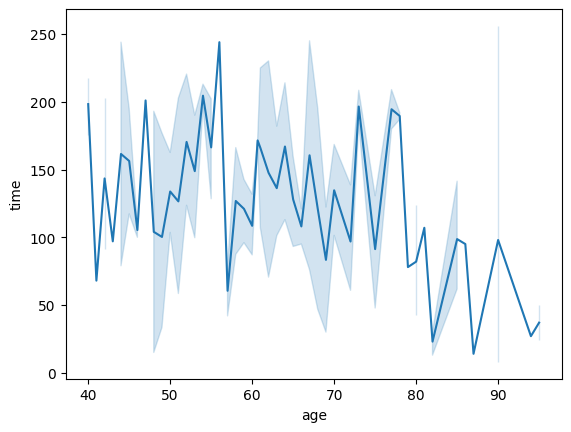

In [16]:
sns.lineplot(x='age', y='time', data=df)
plt.show()

Dari hasil plot line 'Grafik Hubungan Age dan Time', dapat dilihat bahwa pasien pengidap penyakit jantung dengan umur 80an sampai 90an mendapatkan follow-up paling rendah dengan jumlah pasiennya mulai dari 2-7 orang sesuai tabel diatasnya. Dapat dilihat pula pada usia 70an mendapatkan follow-up standar namun lebih banyak dari usia diatasnya walaupun pasien berkisar 1-25 orang. Dari hal tersebut dapat disimpulkan bahwa umur dari pasien pengidap penyakit jantung tidak mempengaruhi banyaknya mendapatkan follow-up terkait penyakitnya.

### Distribusi Jumlah Pasien Penyakit Jantung Berdasarkan Usia

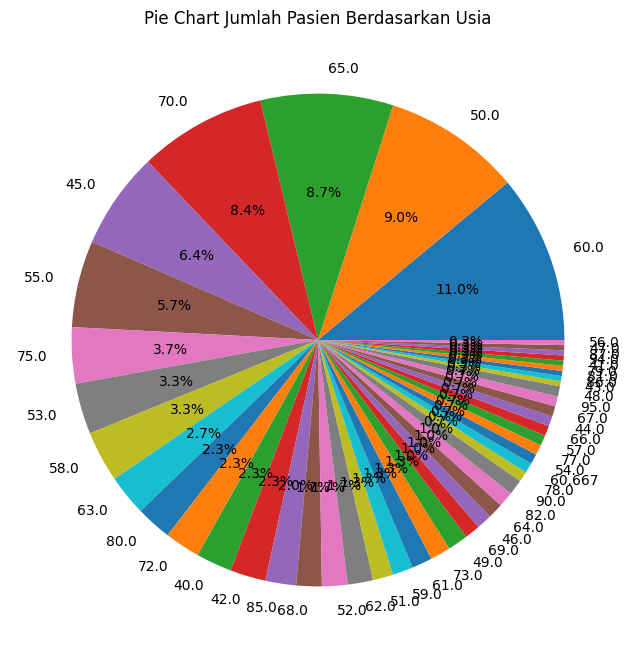

In [17]:
jumlah_pasien = df['age'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(jumlah_pasien.values, labels=jumlah_pasien.index, autopct='%1.1f%%')
plt.title('Pie Chart Jumlah Pasien Berdasarkan Usia')
plt.show()


Pie chart di atas menampilkan distribusi jumlah pasien pengidap penyakit jantung berdasarkan usia. Dapat dilihat bahwa pasien dengan usia 60 tahun memiliki presentase terbesar yaitu mencapai 11%, disusul dengan usia 50 dan 65 tahun. Sedangkan jumlah pasien dengan presentase terkecil yaitu pada usia 56 tahun.

### Distribusi Perbandingan Pasien yang Merokok terhadap Jenis Kelamin

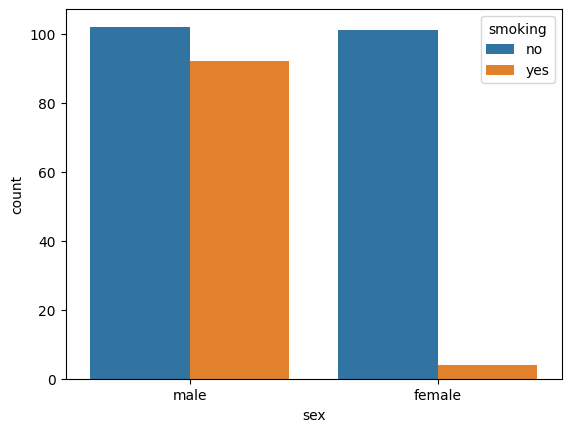

In [18]:
sns.countplot (x=df.sex.replace({0:'female',1:'male'}), hue =df.smoking.replace({0:'no', 1:'yes'}), data=df)
plt.show()

Berdasarkan bar plot Distribusi Perbandingan Pasien yang Merokok terhadap Jenis Kelamin diatas dapat dilihat bahwa jumlah pasien dengan riwayat perokok lebih banyak terjadi pada pria dibandingkan wanita. Terlihat perbedaan yang sangat jauh.

### Korelasi Antar Variable

Membuat gambar (figure) dengan ukuran 18 x 12 inci menggunakan library matplotlib.pyplot (plt). Di dalam gambar tersebut, ditampilkan sebuah heatmap yang merepresentasikan korelasi antara atribut _age_ terhadap variabel-variabel lain dalam dataframe (df_corr) dengan rotasi 90.

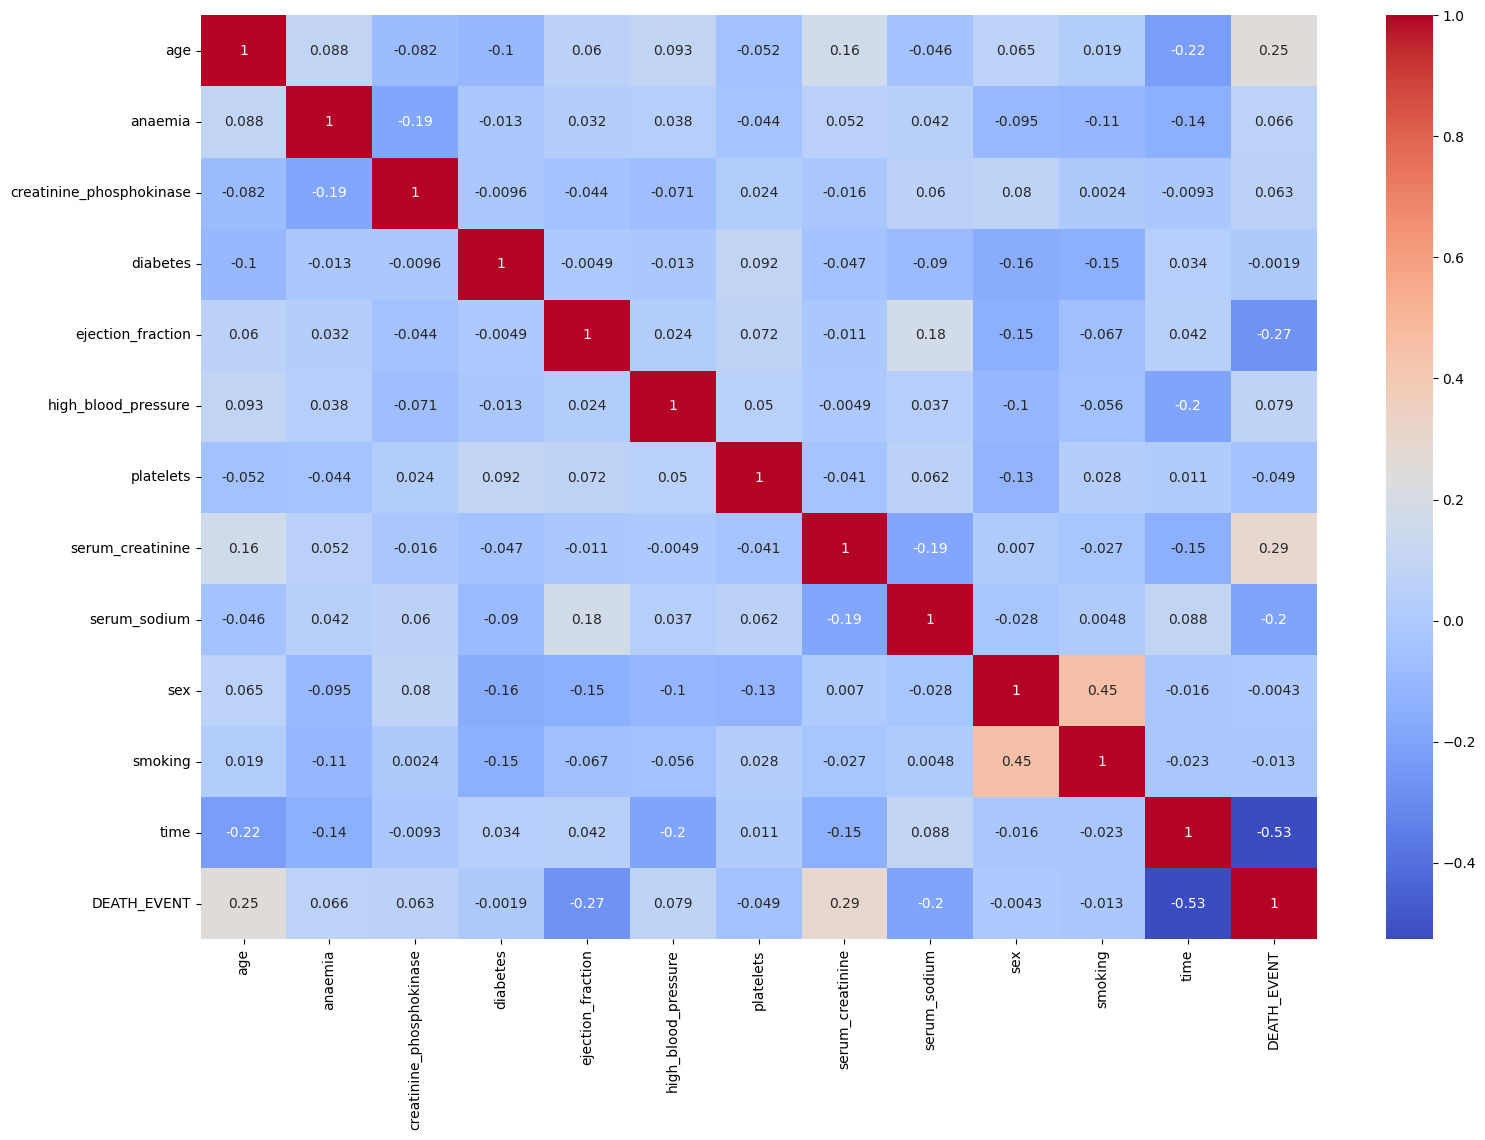

In [19]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.xticks(rotation=90)
plt.show()

Ditemukan beberapa korelasi antara atribut-atribut yang menarik untuk diperhatikan. Pertama, usia pasien memiliki korelasi positif sedang dengan tingkat enzim kreatinin fosfokinase dan tingkat kreatinin dalam serum. Ini menunjukkan bahwa semakin tua usia pasien, semakin tinggi kemungkinan tingkat enzim kreatinin fosfokinase dan tingkat kreatinin dalam serum meningkat. Selanjutnya, terdapat korelasi negatif sedang antara fraksi ejeksi pasien (ejection_fraction) dengan kejadian kematian (DEATH_EVENT). Hal ini menunjukkan bahwa semakin rendah fraksi ejeksi pasien, semakin tinggi kemungkinan terjadinya kejadian kematian. Atribut serum_creatinine juga memiliki korelasi positif yang kuat dengan kejadian kematian, menunjukkan bahwa tingkat kreatinin dalam serum yang tinggi dapat menjadi indikator risiko tinggi terjadinya kejadian kematian. Terakhir, atribut time memiliki korelasi negatif sedang dengan kejadian kematian, menunjukkan bahwa semakin lama pasien dipantau, semakin rendah kemungkinan terjadinya kejadian kematian.

# **6. Data Pre-Processing**

In [20]:
df_processed = df.copy()
df_processed.rename(columns={'DEATH_EVENT':'death','high_blood_pressure':'hypertension'}, inplace=True)
df_processed.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,hypertension,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Feature Selection

In [21]:
# Menghitung korelasi antara setiap atribut dengan kolom target 'age'
corr_matrix = df_processed.corr()
corr_target = corr_matrix['death']

# Membuat dataframe korelasi antara semua atribut terhadap kolom 'age'
df_corr = pd.DataFrame({'attribute':corr_target.index, 'correlation':corr_target.values})
df_corr = df_corr.sort_values(by='correlation', ascending=False)

# Menampilkan dataframe korelasi antara semua atribut terhadap kolom 'age'
print(df_corr)

                   attribute  correlation
12                     death     1.000000
7           serum_creatinine     0.294278
0                        age     0.253729
5               hypertension     0.079351
1                    anaemia     0.066270
2   creatinine_phosphokinase     0.062728
3                   diabetes    -0.001943
9                        sex    -0.004316
10                   smoking    -0.012623
6                  platelets    -0.049139
8               serum_sodium    -0.195204
4          ejection_fraction    -0.268603
11                      time    -0.526964


Analisa ini digunakan untuk menggunakan atribut 'death' sebagai target variabel yang ingin diprediksi di masa yang akan datang, sedangkan atribut lain yang memiliki korelasi diatas +- 0.1 seperti 'serum_creatinine', 'age', 'serum_sodium', 'time', dan 'ejection_fraction' digunakan sebagai fitur yang dipilih untuk membantu prediksi variable target.

In [22]:
df_processed.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,hypertension,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [23]:
columns_to_drop = ['hypertension', 'anaemia', 'smoking', 'platelets', 'creatinine_phosphokinase', 'diabetes', 'sex', 'smoking', 'platelets']
df_processed.drop(columns_to_drop, axis=1, inplace=True)

In [24]:
df_processed.head()

,age,ejection_fraction,serum_creatinine,serum_sodium,time,death
0,75.0,20,1.9,130,4,1
1,55.0,38,1.1,136,6,1
2,65.0,20,1.3,129,7,1
3,50.0,20,1.9,137,7,1
4,65.0,20,2.7,116,8,1


## Data Splitting

In [25]:
# Pisahkan fitur dan label
X = df_processed.drop(['death'], axis=1)
y = df_processed['death']

# Pisahkan df_processed menjadi df_processed latih dan df_processed uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (209, 5)
X_test shape is  (90, 5)
y_train shape is  (209,)
y_test shape is  (90,)


Dilakukan Pembagian data untuk pembuatan model, dimana data training akan memiliki 70% dari jumlah data dan data testing memiliki 30% dari jumlah data. 

## Normalisasi Data

In [26]:
# Melakukan normalisasi dengan SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

## **7. Pendefinisian, Pelatihan, dan Evaluasi Model**

In [27]:
df_processed.head()

,age,ejection_fraction,serum_creatinine,serum_sodium,time,death
0,75.0,20,1.9,130,4,1
1,55.0,38,1.1,136,6,1
2,65.0,20,1.3,129,7,1
3,50.0,20,1.9,137,7,1
4,65.0,20,2.7,116,8,1


## Voting Classifier

Metode ini menggabungkan beberapa model klasifikasi individu (_misalnya: Decision Tree, Logistic Regression, dan K-Nearest Neighbors_) dan menggunakan mekanisme voting mayoritas untuk membuat prediksi akhir.

In [28]:
#Pendefinisian Model Voting Classifier
logreg = LogisticRegression()
dt = DecisionTreeClassifier(max_depth = 5)
knn = KNeighborsClassifier(n_neighbors=3)

In [29]:
vc = VotingClassifier([('clf1', logreg), ('clf2', dt), ('clf3', knn)], voting = 'soft')
vc.fit(X_train, y_train)
y_pred_vc = vc.predict(X_test)

Kode diatas menggunakan Soft Voting dimana prediksi akhir didasarkan pada probabilitas atau skor kelas yang diberikan oleh setiap model. Kemudian, probabilitas kelas rata-rata atau skor kelas dari model-model tersebut digunakan untuk memilih kelas prediksi akhir.

In [30]:
# Melihat nilai akurasi
print('Train Score: {:.4f}'.format(vc.score(X_train, y_train)))
print('Test Score:  {:.4f}'.format(vc.score(X_test, y_test)))

Train Score: 0.9633
Test Score:  0.7667


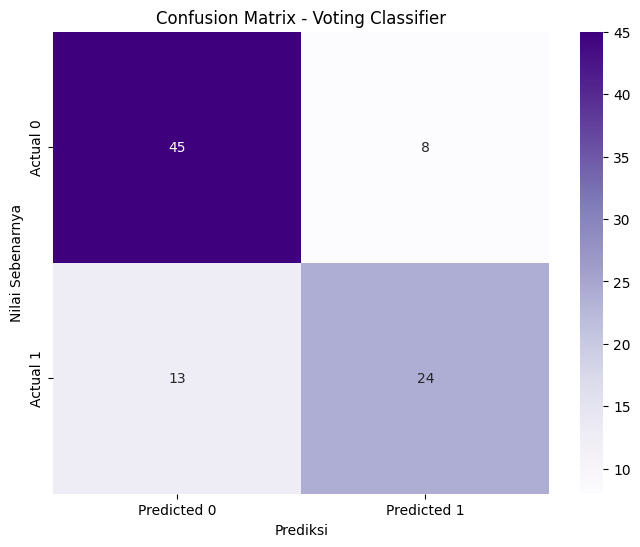

In [31]:
# Membuat confusion matrix
cm_vc = confusion_matrix(y_test, y_pred_vc)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_vc, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - Voting Classifier')
plt.xlabel('Prediksi')
plt.ylabel('Nilai Sebenarnya')
plt.xticks([0.5, 1.5], ['Predicted 0', 'Predicted 1'])
plt.yticks([0.5, 1.5], ['Actual 0', 'Actual 1'])
plt.show() 

Dapat dilihat bahwa pada confussion matrix diatas terdapat 45 yang merupakan sampel yang diprediksi benar sebagai kelas positif. Terdapat 13 sampel yang seharusnya merupakan kelas positif, tetapi diprediksi salah sebagai kelas negatif. Terdapat 8 sampel yang seharusnya merupakan kelas negatif, tetapi diprediksi salah sebagai kelas positif. Terdapat 24 sampel yang diprediksi benar sebagai kelas negatif.

In [32]:
y_pred_vc = vc.predict(X_test)
print(classification_report(y_test, y_pred_vc))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81        53
           1       0.75      0.65      0.70        37

    accuracy                           0.77        90
   macro avg       0.76      0.75      0.75        90
weighted avg       0.77      0.77      0.76        90



Berdasarkan Classification Report yang dihasilkan, model Voting Classifier memiliki performa yang baik dalam memprediksi kelas 0 (tidak terjadi kematian) dengan precision sebesar 0.78 dan recall sebesar 0.85. Ini berarti sekitar 79% dari prediksi model untuk kelas ini benar dan model dapat mengidentifikasi sekitar 85% dari keseluruhan data kelas 0. Namun, model memiliki recall yang lebih rendah untuk kelas 1 (terjadi kematian) dengan nilai 0.65, yang berarti model cenderung mengalami lebih banyak kasus false negative (kematian yang tidak terdeteksi). Secara keseluruhan, model memiliki akurasi sebesar 0.77 atau 70%, yang menunjukkan seberapa baik model dapat memprediksi secara keseluruhan. 

## Random Forest Classifier

In [33]:
# Membuat model Random Forest dan melatihnya dengan training set
model_rf = RandomForestClassifier(random_state=0)
model_rf.fit(X_train, y_train)

# Memprediksi test set menggunakan model yang sudah dilatih
y_pred_rf = model_rf.predict(X_test)

In [34]:
# Melihat nilai akurasi
print('Train Score: {:.4f}'.format(model_rf.score(X_train, y_train)))
print('Test Score:  {:.4f}'.format(model_rf.score(X_test, y_test)))

Train Score: 1.0000
Test Score:  0.7556


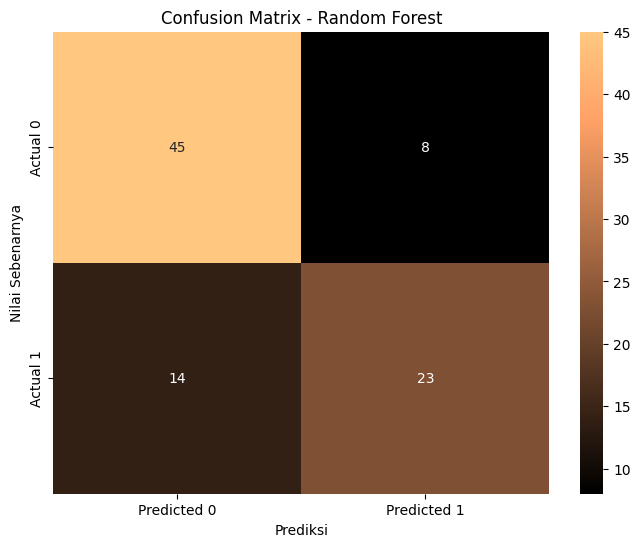

In [35]:
# Membuat confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='copper')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Prediksi')
plt.ylabel('Nilai Sebenarnya')
plt.xticks([0.5, 1.5], ['Predicted 0', 'Predicted 1'])
plt.yticks([0.5, 1.5], ['Actual 0', 'Actual 1'])
plt.show() 

Dapat dilihat bahwa pada confussion matrix diatas terdapat 45 yang merupakan sampel yang diprediksi benar sebagai kelas positif. Terdapat 14 sampel yang seharusnya merupakan kelas positif, tetapi diprediksi salah sebagai kelas negatif. Terdapat 8 sampel yang seharusnya merupakan kelas negatif, tetapi diprediksi salah sebagai kelas positif. Terdapat 23 sampel yang diprediksi benar sebagai kelas negatif.

In [36]:
# Membuat classification report Random Forest
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80        53
           1       0.74      0.62      0.68        37

    accuracy                           0.76        90
   macro avg       0.75      0.74      0.74        90
weighted avg       0.75      0.76      0.75        90



Berdasarkan hasil Classification Report, model Random Forest Classifier menunjukkan kinerja yang baik dalam memprediksi kelas 0 (tidak terjadi kematian), dengan tingkat precision sebesar 0.76 dan recall sebesar 0.85. Namun, model memiliki recall yang lebih rendah untuk kelas 1 (terjadi kematian), yaitu sebesar 0.62, yang berarti ada kemungkinan terjadinya false negative. Secara keseluruhan, model memiliki akurasi sebesar 0.76 atau 76%. 

## Gradient Boosting

In [37]:
# Inisialisasi model Gradient Boosting
gradient_boosting = GradientBoostingClassifier()
# Latih model
gradient_boosting.fit(X_train, y_train)

# Prediksi label untuk data uji
y_pred_gb = gradient_boosting.predict(X_test)

In [38]:
# Melihat nilai akurasi
print('Train Score: {:.4f}'.format(gradient_boosting.score(X_train, y_train)))
print('Test Score:  {:.4f}'.format(gradient_boosting.score(X_test, y_test)))

Train Score: 0.9967
Test Score:  0.7556


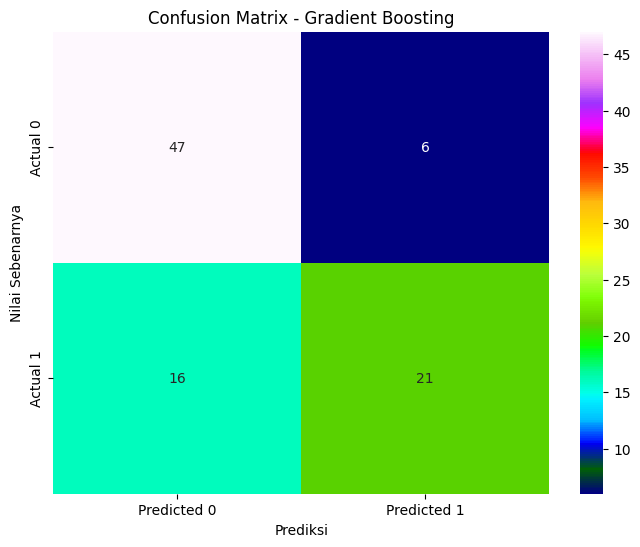

In [39]:
# Membuat confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='gist_ncar')
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Prediksi')
plt.ylabel('Nilai Sebenarnya')
plt.xticks([0.5, 1.5], ['Predicted 0', 'Predicted 1'])
plt.yticks([0.5, 1.5], ['Actual 0', 'Actual 1'])
plt.show()

Dapat dilihat bahwa pada confussion matrix diatas terdapat 47 yang merupakan sampel yang diprediksi benar sebagai kelas positif. Terdapat 14 sampel yang seharusnya merupakan kelas positif, tetapi diprediksi salah sebagai kelas negatif. Terdapat 6 sampel yang seharusnya merupakan kelas negatif, tetapi diprediksi salah sebagai kelas positif. Terdapat 23 sampel yang diprediksi benar sebagai kelas negatif.

In [40]:
# Membuat classification report
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.75      0.89      0.81        53
           1       0.78      0.57      0.66        37

    accuracy                           0.76        90
   macro avg       0.76      0.73      0.73        90
weighted avg       0.76      0.76      0.75        90



Berdasarkan hasil Classification Report, model Gradient Boosting Classifier menunjukkan kinerja yang cukup baik dalam memprediksi kelas 0 (tidak terjadi kematian), dengan tingkat precision sebesar 0.77 dan recall sebesar 0.89. Namun, model memiliki recall yang lebih rendah untuk kelas 1 (terjadi kematian), yaitu sebesar 0.62, yang berarti ada kemungkinan terjadinya false negative. Secara keseluruhan, model memiliki akurasi sebesar 0.78 atau 78%. Meskipun model ini mampu mengidentifikasi dengan baik kasus tidak terjadi kematian, masih diperlukan peningkatan kinerja dalam mengenali kasus kematian agar mendapatkan hasil yang lebih baik.

## Naive Bayes

In [41]:
# Membuat model Naive Bayes dan melatihnya dengan training set
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

# Memprediksi test set menggunakan model yang sudah dilatih
y_pred_nb = model_nb.predict(X_test)

In [42]:
# Melihat nilai akurasi
print('Train Score: {:.4f}'.format(model_nb.score(X_train, y_train)))
print('Test Score:  {:.4f}'.format(model_nb.score(X_test, y_test)))

Train Score: 0.8433
Test Score:  0.7778


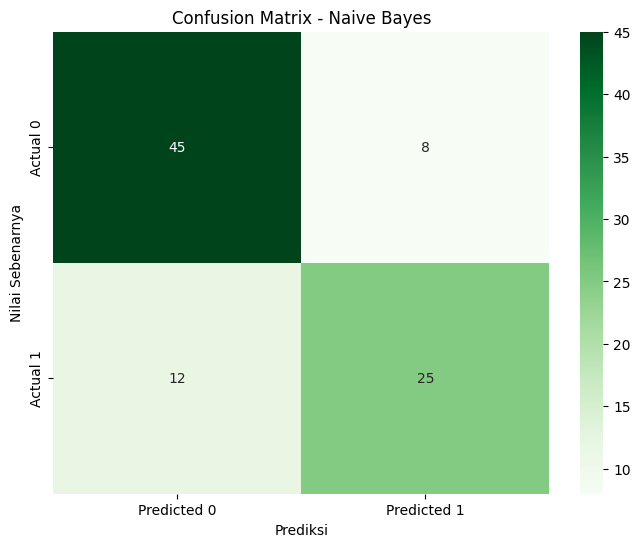

In [43]:
# Membuat confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Prediksi')
plt.ylabel('Nilai Sebenarnya')
plt.xticks([0.5, 1.5], ['Predicted 0', 'Predicted 1'])
plt.yticks([0.5, 1.5], ['Actual 0', 'Actual 1'])
plt.show() 

Dapat dilihat bahwa pada confussion matrix diatas terdapat 45 yang merupakan sampel yang diprediksi benar sebagai kelas positif. Terdapat 12 sampel yang seharusnya merupakan kelas positif, tetapi diprediksi salah sebagai kelas negatif. Terdapat 8 sampel yang seharusnya merupakan kelas negatif, tetapi diprediksi salah sebagai kelas positif. Terdapat 25 sampel yang diprediksi benar sebagai kelas negatif.

In [44]:
# Membuat classification report
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82        53
           1       0.76      0.68      0.71        37

    accuracy                           0.78        90
   macro avg       0.77      0.76      0.77        90
weighted avg       0.78      0.78      0.78        90



Dari hasil Classification Report, model Naive Bayes memiliki tingkat precision sekitar 0.79 dan recall sekitar 0.85 untuk kelas tidak meninggal (kelas 0). Hal ini menunjukkan bahwa sekitar 79% prediksi model yang dinyatakan sebagai tidak meninggal adalah benar, dan model mampu mendeteksi sekitar 85% data tidak meninggal dengan benar. F1-score untuk kelas tidak meninggal adalah 0.82, yang menggabungkan precision dan recall. Untuk kelas meninggal (kelas 1), precision sekitar 0.76, yang berarti sekitar 76% prediksi model yang dinyatakan sebagai meninggal adalah benar. Recall untuk kelas 1 adalah 0.68, yang berarti model mampu mendeteksi sekitar 68% data meninggal dengan benar. F1-score untuk kelas 1 adalah 0.71. Secara keseluruhan, model Naive Bayes memiliki performa yang baik dalam mengklasifikasikan kedua kelas, dengan precision, recall, dan f1-score yang relatif tinggi. Tingkat akurasi model sebesar 78% menunjukkan kemampuannya dalam memprediksi dengan tepat.

## **8. Model Inference**

Dari hasil model-model yang telah diuji, model yang cocok untuk dilakukan model interference adalah Voting Classifier. Model ini memiliki akurasi yang cukup tinggi dengan skor train sebesar 0.9633 dan skor test sebesar 0.7667. Hasil dari classification report juga menunjukkan kinerja yang baik dengan nilai precision, recall, dan f1-score yang seimbang untuk kedua kelas. Model ini dapat digunakan untuk melakukan prediksi terhadap data baru berdasarkan input-nilai yang diberikan.

In [45]:
print('Input Nilai untuk Prediksi Penderita Penyakit Jantung')
age = float(input("Usia: "))
ejection_fraction = float(input("Fraksi Ejeksi: "))
serum_creatinine = float(input('Kadar serum kreatinin: '))
serum_sodium = float(input('Kadar serum sodium: '))
time = float(input('Lama tindak lanjut: '))

val = [age, ejection_fraction, serum_creatinine, serum_sodium, time]

val_predict = model_nb.predict([val])
if val_predict == 1:
    print('Prediksi bernilai 1, maka diprediksi pasien tidak selamat')
elif val_predict == 0:
    print('Prediksi bernilai 0, maka diprediksi pasien selamat')
else:
    print("tidak valid")

Input Nilai untuk Prediksi Penderita Penyakit Jantung
Usia: 33
Fraksi Ejeksi: 35
Kadar serum kreatinin: 1.2
Kadar serum sodium: 132
Lama tindak lanjut: 30
Prediksi bernilai 0, maka diprediksi pasien selamat


## **9. Kesimpulan**

Dari analisis yang telah kami lakukan, maka dapat diperoleh kesimpulan sebagai berikut:
1. Pada Dataset terdapat 13 atribut yang diperkirakan sebagai faktor untuk memprediksi keselamatan pasien dari penyakit jantung. Namun setelah dilakukan analisis disimpulkan bahwa semua atribut menjadi faktor kuat yang memprediksi keselamatan pasien dari penyakit jantung, namun hanya terdapat beberapa atribut dengan nilai korelasi diatas 0.1 dan dibawah -0.1, yaitu atribut age, diabetes, serum_creatinine, dan time sebagai faktor yang memprediksi keselamatan pasien dari penyakit jantung.
2. Status gender tidak mempengaruhi tingkat status kematian secara signifikan terhadap death event. Status pasien perokok atau tidak, juga tidak terlalu berpengaruh banyak terhadap death event. Tetapi, pasien yang memiliki anaemia tingkat kematian lebih tinggi daripada yang tidak.
3. Hasil akurasi dengan menggunakan 4 model ensemble method diantaranya Random Forest Classifier dengan nilai akurasi 76%, Gradient Boosting dengan nilai akurasi 78%, Naive Bayes dengan akurasi 78% dan Voting Classifier dengan nilai akurasi 77% sama-sama baik dan bisa digunakan untuk dilakukan prediksi keselamatan pasien dari penyakit jantung.
4. Voting Classifier merupakan algoritma yang terbaik untuk case ini karena meskipun terdapat perbedaan akurasi yang tidak terlalu berbeda secara signifikan dengan yang lain, namun karena memadukan prediksi dari beberapa model yang berbeda dapat menghasilkan keputusan yang lebih stabil dan mengurangi risiko overfitting.